## Name: Chandrika M jethva
## Roll no: 130
## Class / Btach: SE AIML / B - 2
## Date: 12 / 02 / 2026
## Experiment-4: Classification Using Logistic Regression, Decision Tree, and k-Nearest Neighbors.

### PART A- Data Preparation

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

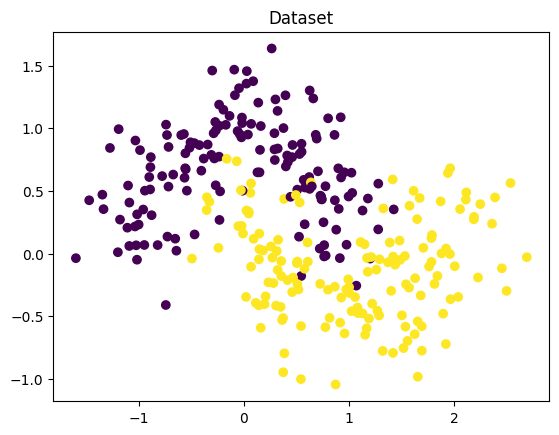

In [2]:
# Create 2D dataset
X, Y = make_moons(n_samples = 300, noise = 0.25, random_state = 42)

plt.scatter(X[:,0], X[:,1], c = Y)
plt.title("Dataset")
plt.show()

In [3]:
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size = 0.3, random_state = 0
)

In [4]:
# Scaling (need for LR and KNN)
scaler = StandardScaler()
X_trained_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### PART B: Logistic Regression

In [9]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_trained_scaled, Y_train)
Y_pred_lr = lr.predict(X_test_scaled)
print("Logistic Regression")
print("Accuracy:", accuracy_score(Y_test, Y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_lr))

Logistic Regression
Accuracy: 0.8777777777777778
Confusion Matrix:
 [[34  5]
 [ 6 45]]


### PART C: Decision Tree

In [10]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(X_train, Y_train)    # No scaling required
Y_pred_dt = dt.predict(X_test)

print("Dicision Tree")
print("Accuracy:", accuracy_score(Y_test, Y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_dt))

Dicision Tree
Accuracy: 0.8555555555555555
Confusion Matrix:
 [[30  9]
 [ 4 47]]


### PART D: K-Nearest Neighbor (KNN)

In [11]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_trained_scaled, Y_train)
Y_pred_knn = knn.predict(X_test_scaled)

print("K-Nearest Neighbor (KNN)")
print("Accuracy:", accuracy_score(Y_test, Y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_knn))

K-Nearest Neighbor (KNN)
Accuracy: 0.9111111111111111
Confusion Matrix:
 [[38  1]
 [ 7 44]]


### PART E: Visualization

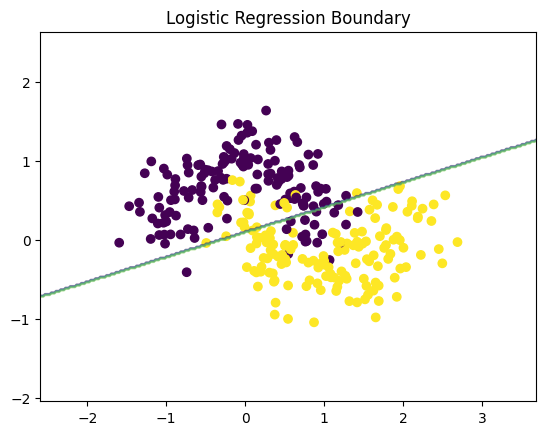

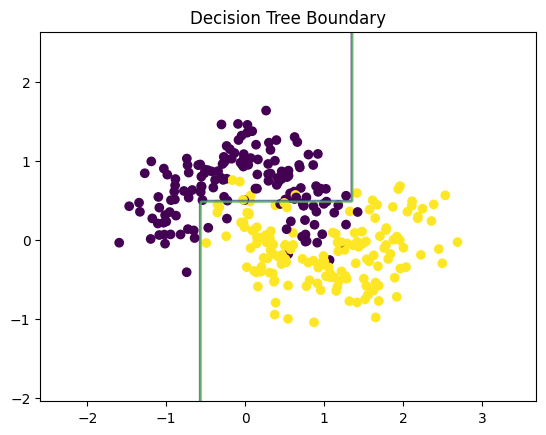

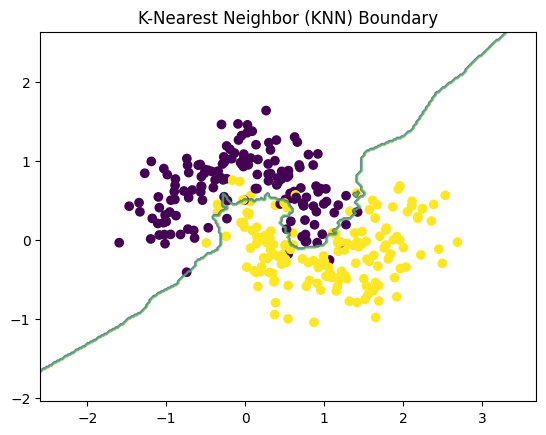

In [12]:
# Plotting boundry

def plot_boundary(model, scaled, title):

    h = 0.02
    X_min, X_max = X[:,0].min() - 1, X[:,0].max() + 1
    Y_min, Y_max = X[:,1].min() - 1, X[:,1].max() + 1

    XX, YY = np.meshgrid(np.arange(X_min, X_max, h),
                         np.arange(Y_min, Y_max, h))
    
    grid = np.c_[XX.ravel(), YY.ravel()]

    if scaled:
        grid = scaler.transform(grid)

    Z = model.predict(grid)
    Z = Z.reshape(XX.shape)

    plt.contour(XX, YY, Z, alpha = 0.3)
    plt.scatter(X[:,0], X[:,1], c = Y)
    plt.title(title)
    plt.show()

plot_boundary(lr, True, "Logistic Regression Boundary")
plot_boundary(dt, False, "Decision Tree Boundary")
plot_boundary(knn, True, "K-Nearest Neighbor (KNN) Boundary")